In [2]:
import analysis_tools as at
import h5py as h5
import matplotlib.pyplot as plt
import numpy as np
import os

In [5]:
for filename in os.listdir('od_data'):
    at.merge_hdf5_files('od_master.h5', 'od_data/'+filename)

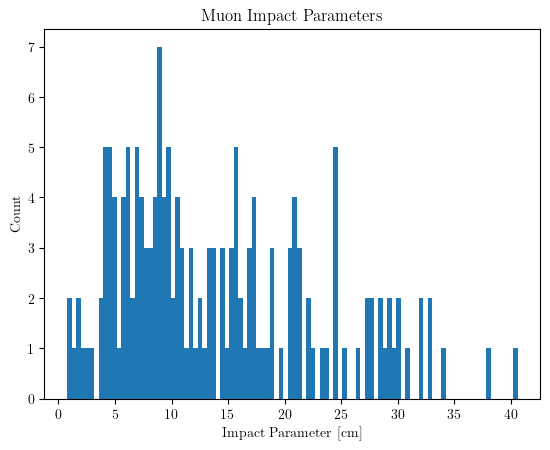

In [6]:
at.plot_impact_hist('od_master.h5', bins = 100)

In [11]:
points = h5.File('od_master.h5')['data']['neutron_xyz']

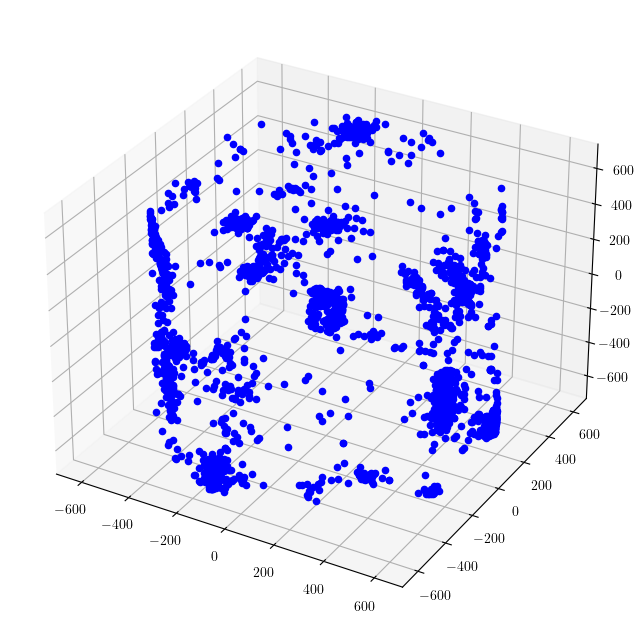

In [12]:
import mpl_toolkits.mplot3d.axes3d as axes3d
# Change figure size to your liking
fig = plt.figure(figsize = (10,8))
    
# Necessary for 3-dimensional projection
ax = fig.add_subplot(1, 1, 1, projection='3d')

for point in points:
    ax.scatter(point[0], point[1], point[2], color = 'b')

In [ ]:

import mpl_toolkits.mplot3d.axes3d as axes3d

Height = 172 #cm
Radius = 64 # cm

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1, 1, 1, projection='3d')

u = np.linspace(0, np.pi*2, 60)
t = np.linspace(0, Radius, 60)
z = np.linspace(-Height/2, Height/2, 2)

#Defining the parametric space for making the top and bottom circles
U, T = np.meshgrid(u, t)

#For top and bottom
X1 = T*np.cos(U)
Y1 = T*np.sin(U)
ZTop = Height/2*np.ones(X1.shape)
ZBottom = -Height/2*np.ones(X1.shape)

#Defining the parametric space for making the cylindrical column
z = np.linspace(-Height/2, Height/2, 2)
u, z = np.meshgrid(u, z)

x = Radius * np.cos(u)
y = Radius * np.sin(u)

#Column
ax.plot_surface(x, y, z, color='b', alpha = 0.3)
#Top & Bottom
ax.plot_surface(X1, Y1, ZTop, alpha=0.3, color='cyan', rstride=6, cstride=12)
ax.plot_surface(X1, Y1, ZBottom, alpha=0.7, color='green', rstride=6, cstride=12)
plt.show()